<a href="https://colab.research.google.com/github/NatashaKamami/Machine-Learning-1/blob/main/BlueBerries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
blueberry_data = pd.read_csv('/content/WildBlueberryPollinationSimulationData.csv')
blueberry_data.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [ ]:
blueberry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [ ]:
blueberry_data.drop(columns=['Row#'], inplace=True)

In [ ]:
blueberry_data.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [ ]:
blueberry_data.isnull().sum()

,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0
MinOfLowerTRange,0


In [ ]:
blueberry_data.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


##**Data Analysis**

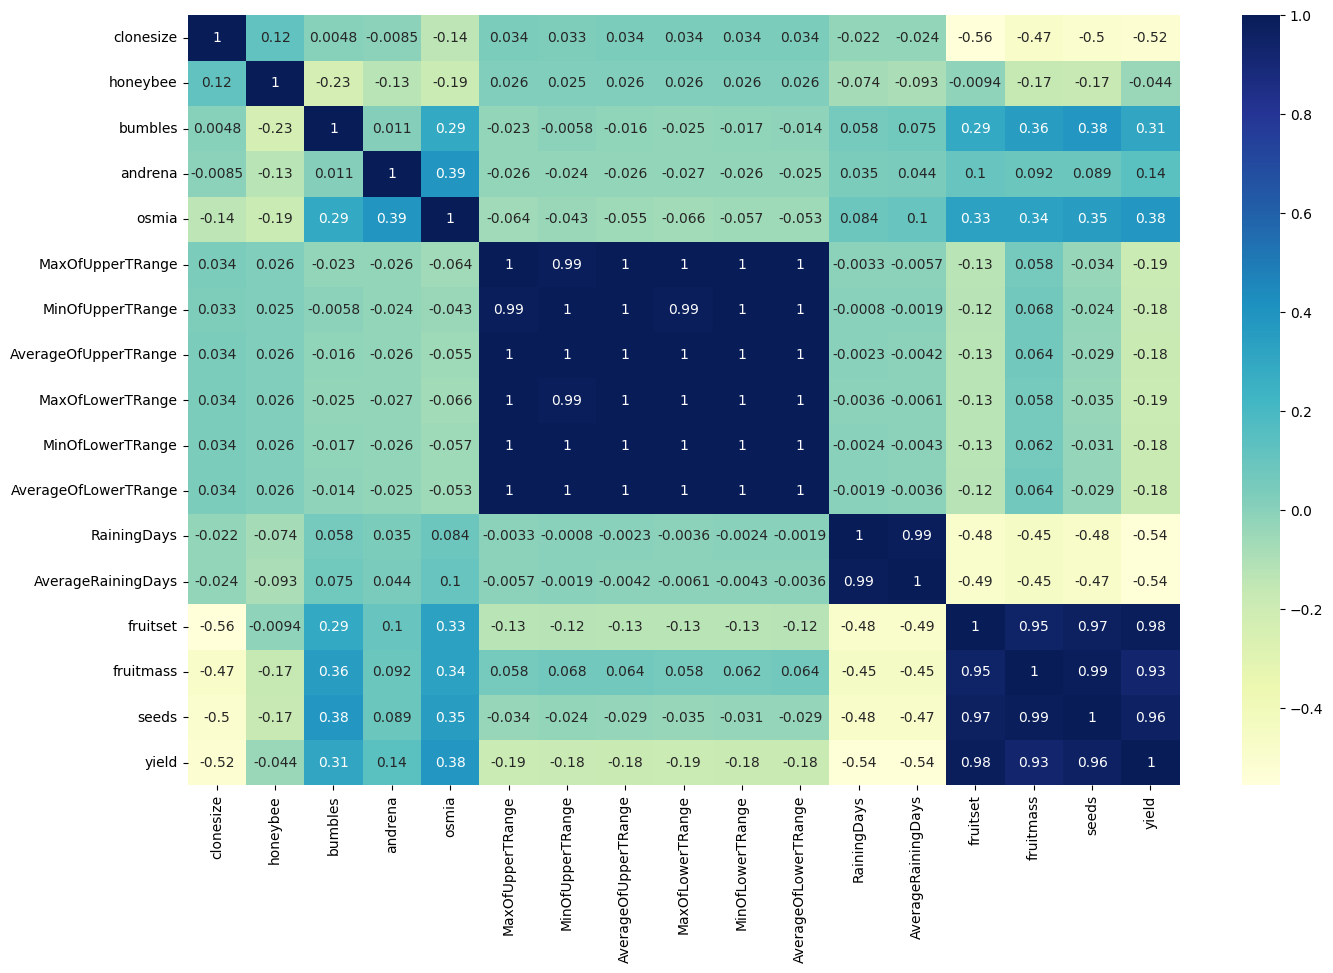

In [ ]:
# correlation of variables
plt.figure(figsize = (16, 10))
sns.heatmap(blueberry_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
# Defining Feature and Target variables
X = blueberry_data[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'AverageRainingDays', 'seeds']]
y = blueberry_data['yield']

In [ ]:
model = LinearRegression()

# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=7, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
mse_scores = -cv_scores

# Print individual Mean Squared Error scores and average
print("Mean Squared Error for each fold:", mse_scores)
print("Average Mean Squared Error:", np.mean(mse_scores))

Mean Squared Error for each fold: [ 30091.78361981  11711.39535447  17523.52303103  15823.55440133
  22770.27420005  23082.35038915 958551.47732782]
Average Mean Squared Error: 154222.05118909298


In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression
model1 = make_pipeline(StandardScaler(), LinearRegression())
model1 = model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print('Mean Squared error:', mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Mean Squared error: 27902.16339422926
R2 score: 0.985644286101044


In [ ]:
# Polinomial Regression
model2 = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
model2 = model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print('Mean Squared error:', mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Mean Squared error: 32090.186084967412
R2 score: 0.98348954079685
